# Unet

Trochę skromny notatnik. Wyniki niezadowalające porównując sliceami dane orignalne orginalne z tymi z 'patchami'.

### Opis moich działań:
- Zmniejszenie wymiarów (/scripts/generate_train_data) na 256x256x256, bo unet chyba oczekuje danych o wymiarach wynoszących 2 do jakiejś potęgi poprzez indeksowanie [0:256, 0:256, 400:656]. Ostatni wymiar zrobiłem tak bo wydawało mi się, że w osi z od 0 do mniej więcej 400 dane są monotonne (widać mniej kształtów). Miałem nadzieje, że przez to wyniki będa bardziej reprezentatywne, bo obszar właśnie od 0 do 400 jest znacząco inny od pozostałych.
- Stworzenie datasetu i modelu unet oraz troche zmienionej funckji do generowania danych (/src/ptp/unet_utils). To był mój pierwszy raz gdy używałem pytorcha, lightninga i monaia, więc pewnie jest wiele do poprawy. Funkcje do generowania danych troche uprościłem dla moich potrzeb (rescaluje, wycina zawsze w osi z). Jeśli chodzi o transormacje z monaia to troche o nich czytałem, ale i tak nie wiedziałem do końca któryc powinienem użyć. Ostatecznie użyłem tylko 2: Orientationd, ScaleIntensityd. Niektóre mi nie działały i nie wiedziałem jak to rozwiązać. Jako funkcje strat przyjąłem Structural Similiarity Loss.
- Wyniki uzyskane przez mój model są wizualnie przedstawione poniżej na wykresach, nie są one zbyt dobre niestety. Prawde mówiąc nie skupiłem się na warotściach ssimloss wytrenowanego modelu, mój błąd.


In [2]:
import os
from google.colab import drive
import sys
import pytorch_lightning as pl
import torch

In [13]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/PTP2')

In [3]:
sys.path.append('/content/drive/My Drive/PTP2/src/ptp')
from unet_utils import PtpDataset, Net

In [4]:
dataset = PtpDataset(data_dir='/content/drive/My Drive/generated_data')

In [4]:
len(dataset)

25

In [8]:
unet = Net(dataset)

In [10]:
unet.prepare_data()

In [ ]:
trainer = pl.Trainer(max_epochs=8)
trainer.fit(unet)

In [16]:
# zapisałem uneta wrazie czego
save_path = "drive/My Drive/unet_model2.pth"

torch.save(unet.state_dict(), save_path)



In [ ]:
model = Net(dataset)
model.load_state_dict(torch.load("/content/drive/My Drive/unet_model2.pth"))
model.eval()

Wyniki: na wizualizacjach missing seismic to foraward mojego uneta

Jak widać, wyniki słabe ://

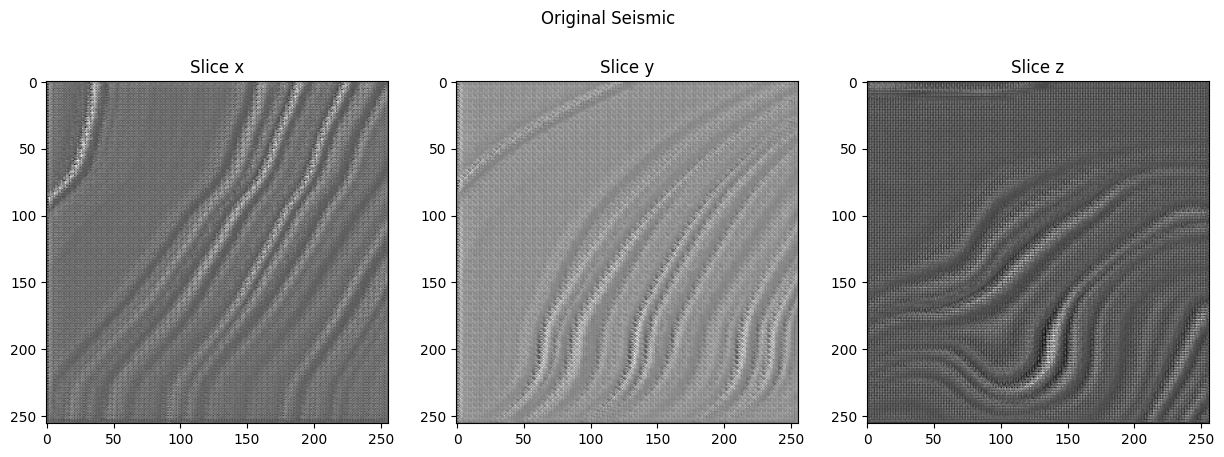

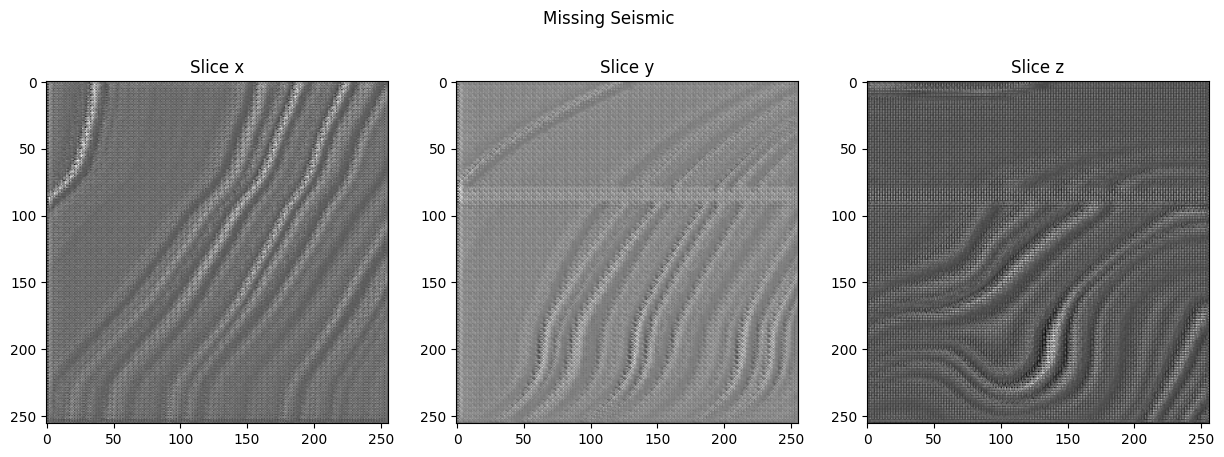

In [7]:
with torch.no_grad():
    output = model.visualize_results(dataset[0])

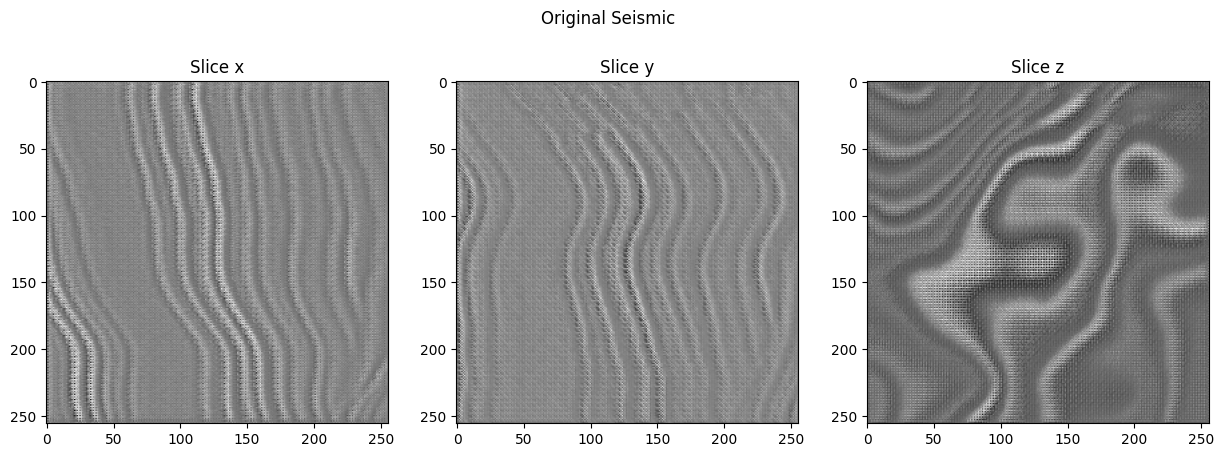

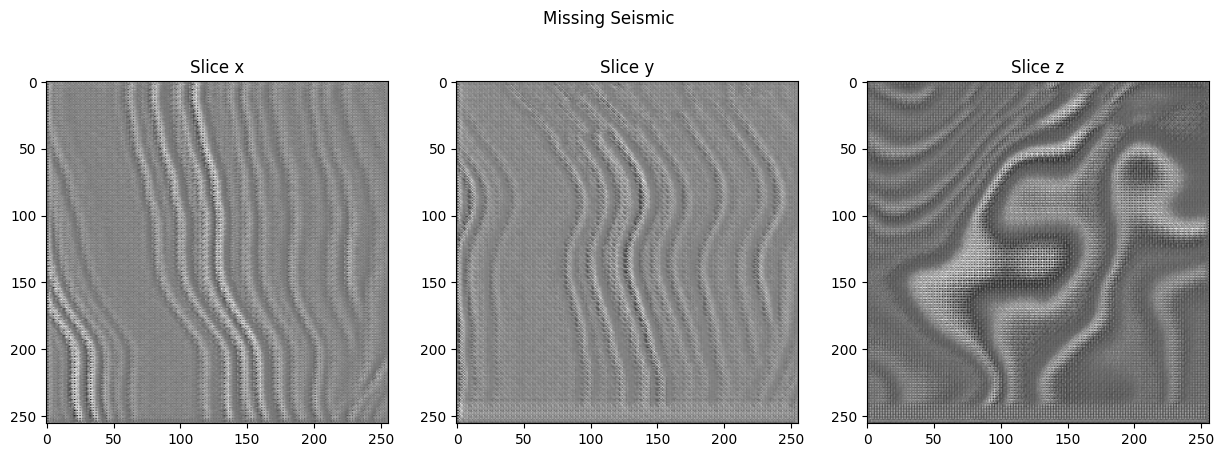

In [8]:
with torch.no_grad():
    output = model.visualize_results(dataset[1])

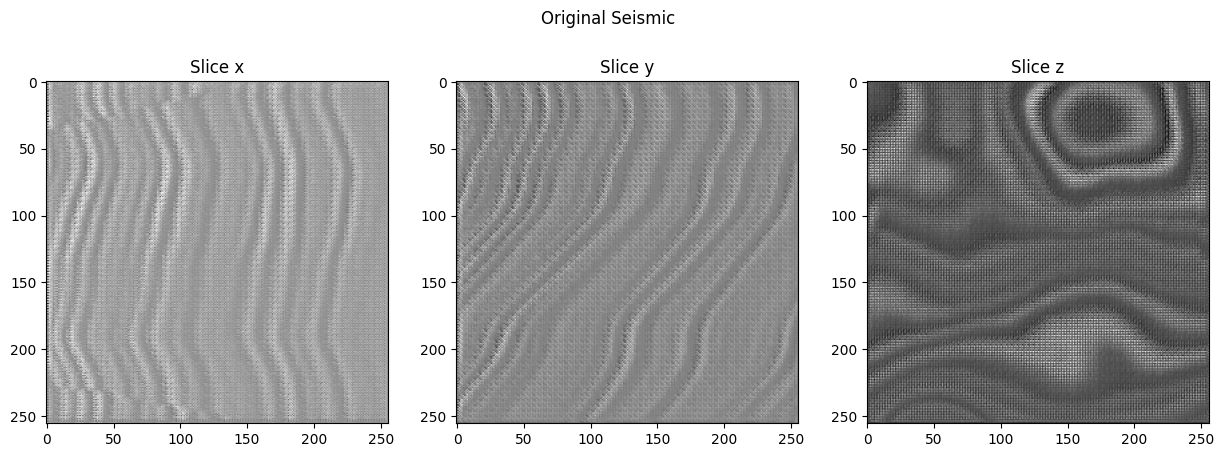

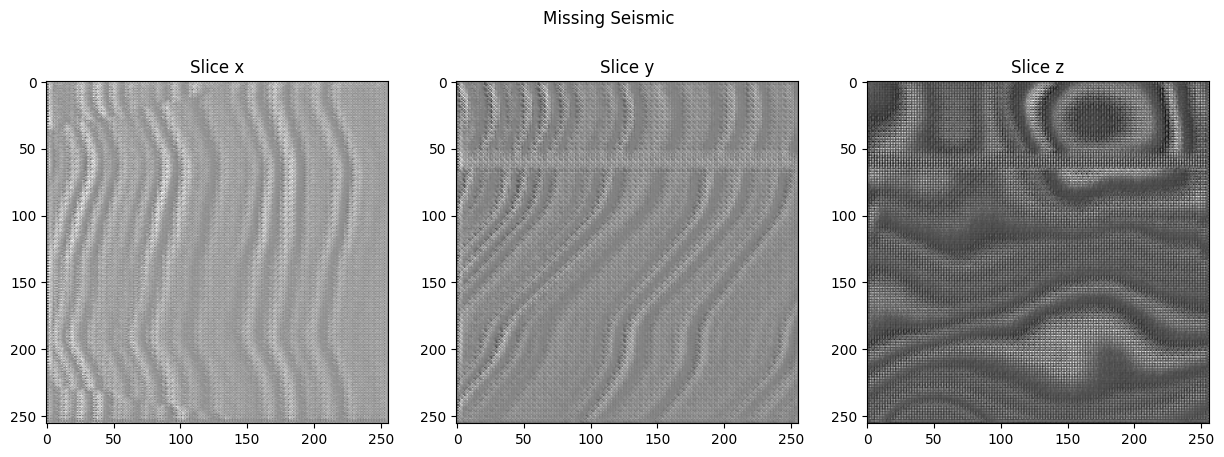

In [9]:
with torch.no_grad():
    output = model.visualize_results(dataset[10])

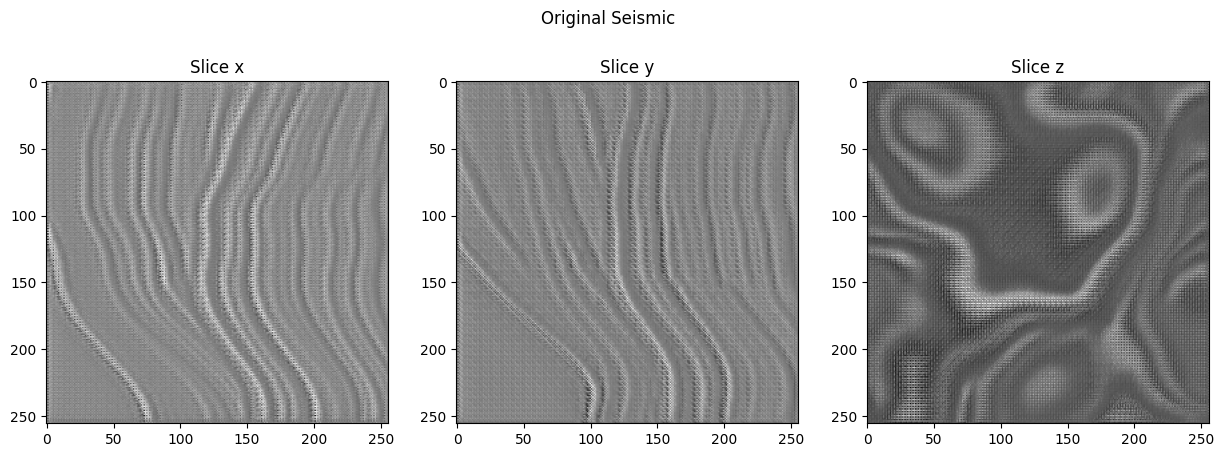

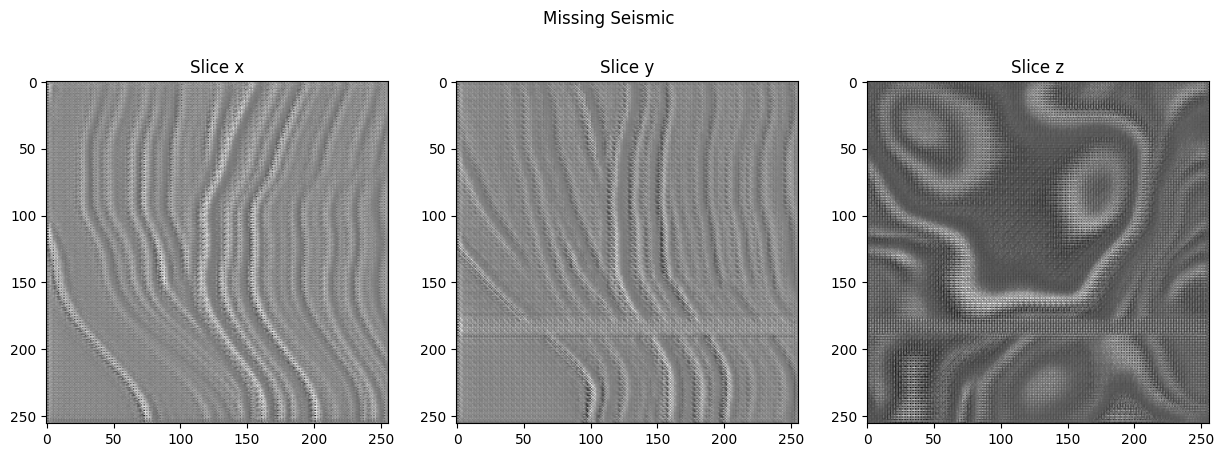

In [10]:
with torch.no_grad():
    output = model.visualize_results(dataset[15])

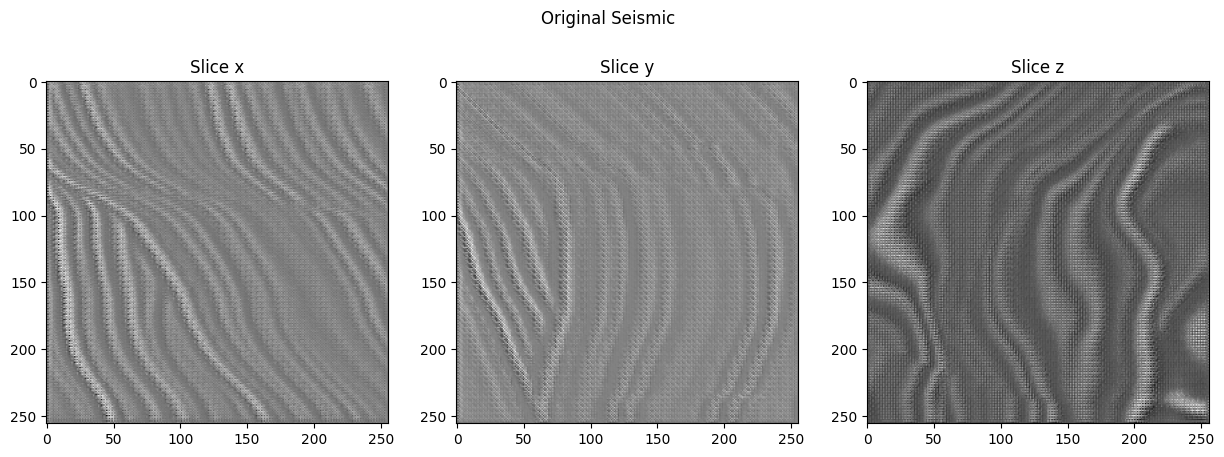

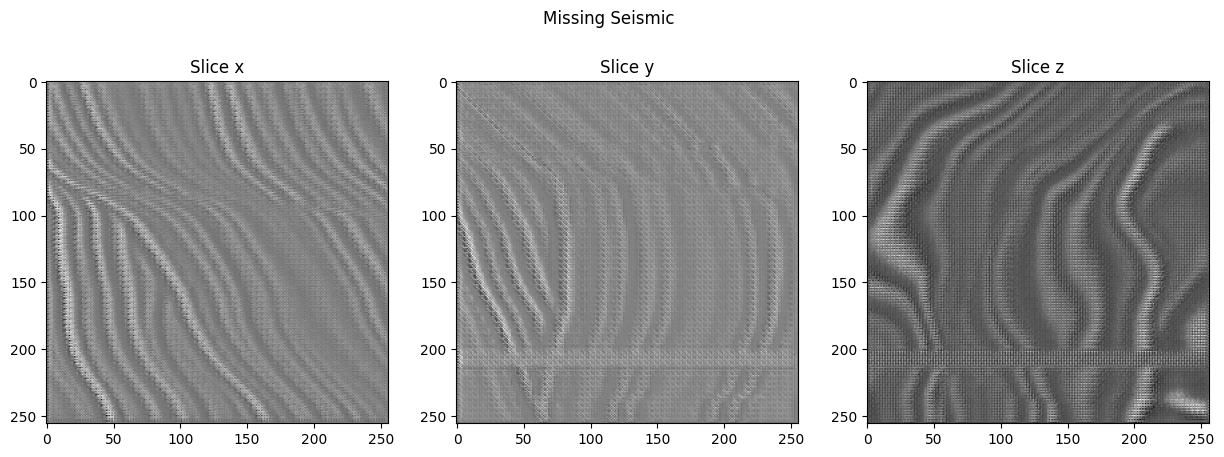

In [11]:
with torch.no_grad():
    output = model.visualize_results(dataset[20])

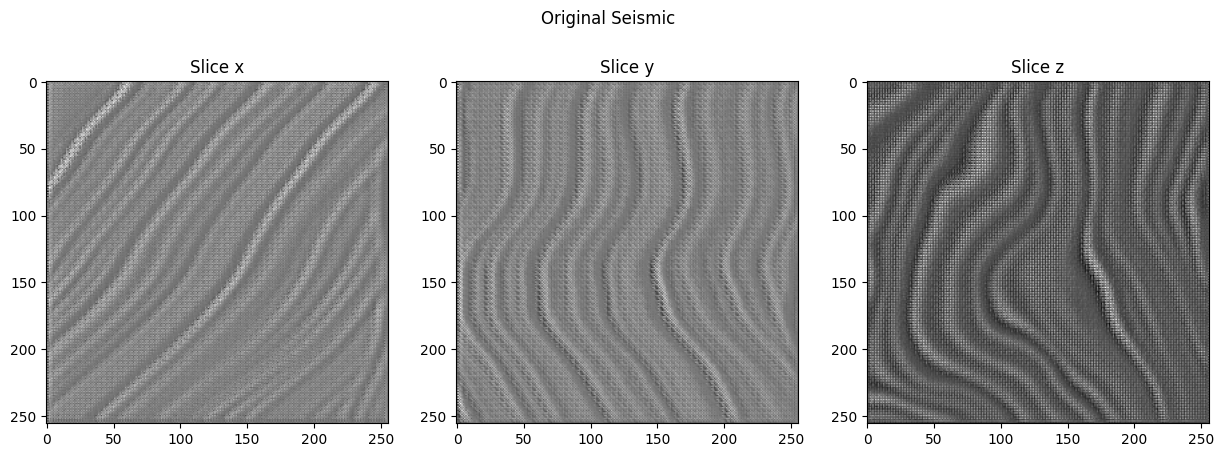

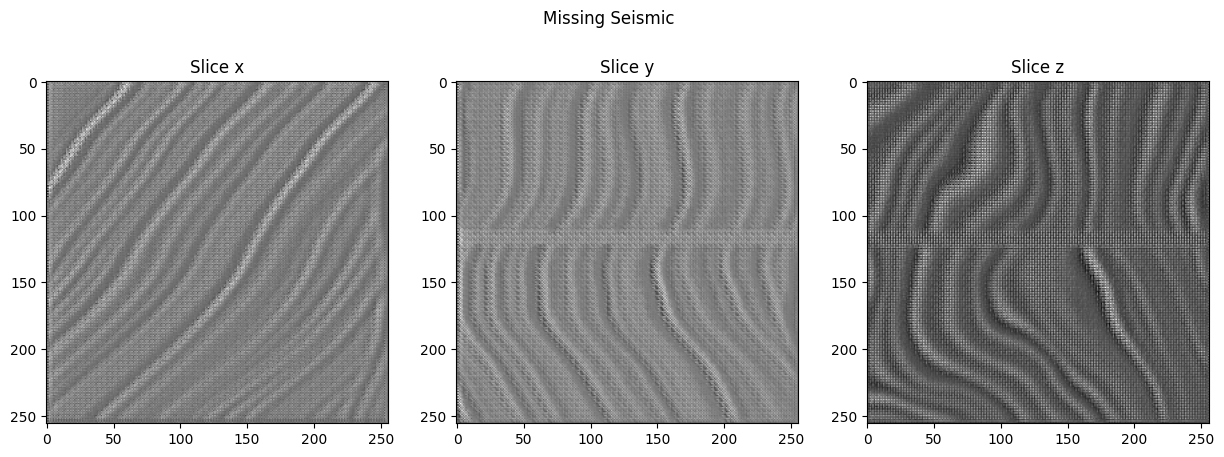

In [12]:
with torch.no_grad():
    output = model.visualize_results(dataset[24])